<a href="https://colab.research.google.com/github/Kondasagar/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

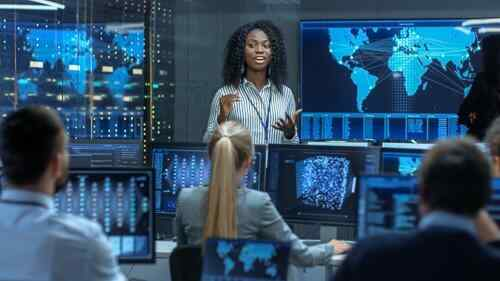

## Mounting the drive 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Importing the requisite libraries which are important for this analysis

In [2]:
# importing pandas, numpy  libraries
import pandas as pd
import numpy as np 

# Importing visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [3]:
# loading the data set
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter/capstone_projects/Global_terrorism/Copy of Global Terrorism Data.csv',
               encoding='latin1',low_memory=False)

## 2. Exploring the Original Data set:


---




In [4]:
# knowing the shape of data frame
print(f"shape of our data set is {df.shape}")

shape of our data set is (181691, 135)


In [5]:
# first five rows of data set
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
# last five rows of the data set
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [7]:
# information of data set by using .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [8]:
# statistic of  numerical features in our data set 
# (summary of dataset)
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# names of features(columns) in our data set 
for col in df.columns:
  print(col,end=' ; ')
  

eventid ; iyear ; imonth ; iday ; approxdate ; extended ; resolution ; country ; country_txt ; region ; region_txt ; provstate ; city ; latitude ; longitude ; specificity ; vicinity ; location ; summary ; crit1 ; crit2 ; crit3 ; doubtterr ; alternative ; alternative_txt ; multiple ; success ; suicide ; attacktype1 ; attacktype1_txt ; attacktype2 ; attacktype2_txt ; attacktype3 ; attacktype3_txt ; targtype1 ; targtype1_txt ; targsubtype1 ; targsubtype1_txt ; corp1 ; target1 ; natlty1 ; natlty1_txt ; targtype2 ; targtype2_txt ; targsubtype2 ; targsubtype2_txt ; corp2 ; target2 ; natlty2 ; natlty2_txt ; targtype3 ; targtype3_txt ; targsubtype3 ; targsubtype3_txt ; corp3 ; target3 ; natlty3 ; natlty3_txt ; gname ; gsubname ; gname2 ; gsubname2 ; gname3 ; gsubname3 ; motive ; guncertain1 ; guncertain2 ; guncertain3 ; individual ; nperps ; nperpcap ; claimed ; claimmode ; claimmode_txt ; claim2 ; claimmode2 ; claimmode2_txt ; claim3 ; claimmode3 ; claimmode3_txt ; compclaim ; weaptype1 ; wea

In [10]:
# list of columns
print(df.columns.to_list())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [11]:
# finding duplicate rows
df.duplicated().value_counts()

False    181691
dtype: int64

* All rows are unique

In [12]:
# total number of deaths
df['nkill'].sum()

411868.0

In [13]:
# 'nkillus' : the number US people dies
df['nkillus'].value_counts().head()

0.0    116344
1.0       589
2.0       159
3.0        53
4.0        32
Name: nkillus, dtype: int64

In [14]:
# 'nkill' : the total number of fatalities(number of people died) including 'US' citizens
df['nkill'].value_counts().head(10)

0.0     88149
1.0     36576
2.0     14147
3.0      7738
4.0      4961
5.0      3565
6.0      2552
7.0      1960
8.0      1495
10.0     1192
Name: nkill, dtype: int64

In [15]:
# number of times a country appeared in our data set (number of times atttacks placed in that country)
df['country_txt'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: country_txt, Length: 205, dtype: int64

## The Most number of terrorist attacks happened in Iraq then followed by Pakistan, Afghanistan, India and Colombia.

In [16]:
# the active terrorist groups
df['gname'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: gname, Length: 3537, dtype: int64

In [17]:
# Most active terrorist group in the world
print(f"The most active terrorist group in the world is {df['gname'].value_counts().index[1]}.")

The most active terrorist group in the world is Taliban.


In [18]:
# the maximum number of people killed in an attack
print(f"The most number of people killed in an attack is {df['nkill'].max()}.")

The most number of people killed in an attack is 1570.0.


In [19]:
# number of terrorist attacks happened in each year from max to min number of times.
df["iyear"].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

In [20]:
# The year with high number of deaths
print(f"Year with most number of terrorist attacks is : {df['iyear'].value_counts().idxmax()}")

Year with most number of terrorist attacks is : 2014


In [21]:
# The year with least number of deaths due to terrorist attacks
print(f"Year with least number of terrorist attacks is : {df['iyear'].value_counts().idxmin()}")

Year with least number of terrorist attacks is : 1971


In [22]:
# Different types of attacks done by terrorist groups
df['attacktype1_txt'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [23]:
# Counts of different attack types
df['attacktype1_txt'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

## The most attack type done by terrorist is Bombing/Explosion.

In [24]:
# finding null values in country text
df['country_txt'].isnull().value_counts()

False    181691
Name: country_txt, dtype: int64

## No null values in country_txt column


---
NaN and null value are interchangeble words in python language.


In [25]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [26]:
df.isnull().sum().sum()/(df.shape[0]*df.shape[1])

0.5648171896241421

* 56% of the data is filled with null values, so it is better to remove the feature which are not necessary for our study.

# There is a lot of data in this dataframe. So we can extract the data which is useful for our analysis. 

# If we want to rename some column names, we can so that the readers can understand the data by seeing the column name. 

# We had to check for null values in our data. And we had to handle those missing values and null values by removing them or by replacing them with appropriate values.

In [27]:
# the whole 135 columns name in original dataframe
print(df.columns.to_list())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [28]:
# first two rows
df.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [29]:
# extracting important features(columns) to create new data frame for EDA
new_df=df[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city',  'latitude', 'longitude', 'summary',
           'attacktype1_txt', 'targtype1_txt', 'gname', 'weaptype1_txt', 'nkill', 'nwound']]

In [30]:
# Renaming columns name for better understanding
new_df.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'region_txt':"Region", 'provstate':'State',
                       'city':'City','latitude':'Latitude', 'longitude':'Longitude', 'summary':'Summary', 'attacktype1_txt':'Attack_Type',
                       'targtype1_txt':'Target_Type', 'gname':'Group','weaptype1_txt':'Weapon_Type', 'nkill':'Killed', 'nwound':'Wounded'},inplace=True)

In [31]:
# summary about new data frame
new_df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [32]:
# information about features in new_df
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   State        181270 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   Summary      115562 non-null  object 
 10  Attack_Type  181691 non-null  object 
 11  Target_Type  181691 non-null  object 
 12  Group        181691 non-null  object 
 13  Weapon_Type  181691 non-null  object 
 14  Killed       171378 non-null  float64
 15  Wounded      165380 non-null  float64
dtypes: float64(4), int64(3), object(9)
memory usage: 22.2+ MB


In [33]:
new_df.isnull().sum().sum()*100/(new_df.shape[0]*new_df.shape[1])

3.533506062490712

* 2% of the data in new data frame filled with null values.

## In new_df, total entries(rows) are around 1,81,691. If we abserve the non-null values count, we can say that, there are lot of null values in columns named "Latitude", "Longitude", "Summary", "Killed". Even if we decided to remove the rows which are having null values we will end up with more than 1,15,000 rows (These rows are enough for Exploratory Data Analysis). But if we drop these rows, we will lost important data.

In [34]:
# Replacing null values in killed and wounded with zero
new_df["Killed"]=new_df["Killed"].fillna(0).astype(int)
new_df["Wounded"]=new_df["Wounded"].fillna(0).astype(int)

In [35]:
# replacing null value in city and state columns with 'unknown'
new_df['State']=new_df['State'].fillna('unknown')
new_df['City']=new_df['State'].fillna('unknown')

In [36]:
# new column named "casualities" can be defined by using "Killed" and "Wounded" features
new_df["Casualties"]=new_df["Killed"]+new_df["Wounded"]
new_df.head(2)

,Year,Month,Day,Country,Region,State,City,Latitude,Longitude,Summary,Attack_Type,Target_Type,Group,Weapon_Type,Killed,Wounded,Casualties
0,1970,7,2,Dominican Republic,Central America & Caribbean,unknown,unknown,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,MANO-D,Unknown,1,0,1
1,1970,0,0,Mexico,North America,Federal,Federal,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0,0,0


In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   State        181691 non-null  object 
 6   City         181691 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   Summary      115562 non-null  object 
 10  Attack_Type  181691 non-null  object 
 11  Target_Type  181691 non-null  object 
 12  Group        181691 non-null  object 
 13  Weapon_Type  181691 non-null  object 
 14  Killed       181691 non-null  int64  
 15  Wounded      181691 non-null  int64  
 16  Casualties   181691 non-null  int64  
dtypes: float64(2), int64(6), object(9)
memory usage: 23.6+ MB


In [38]:
# saving new_df as excel file
# new_df.to_excel('global_terrorism_data.xlsx')

In [39]:
# first ten rows
new_df.head(10)

,Year,Month,Day,Country,Region,State,City,Latitude,Longitude,Summary,Attack_Type,Target_Type,Group,Weapon_Type,Killed,Wounded,Casualties
0,1970,7,2,Dominican Republic,Central America & Caribbean,unknown,unknown,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,MANO-D,Unknown,1,0,1
1,1970,0,0,Mexico,North America,Federal,Federal,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0,0,0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Tarlac,15.478598,120.599741,NaN,Assassination,Journalists & Media,Unknown,Unknown,1,0,1
3,1970,1,0,Greece,Western Europe,Attica,Attica,37.997490,23.762728,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,0,0,0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,0,0,0
5,1970,1,1,United States,North America,Illinois,Illinois,37.005105,-89.176269,1/1/1970: Unknown African American assailants ...,Armed Assault,Police,Black Nationalists,Firearms,0,0,0
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,NaN,Assassination,Police,Tupamaros (Uruguay),Firearms,0,0,0
7,1970,1,2,United States,North America,California,California,37.791927,-122.225906,1/2/1970: Unknown perpetrators detonated explo...,Bombing/Explosion,Utilities,Unknown,Explosives,0,0,0
8,1970,1,2,United States,North America,Wisconsin,Wisconsin,43.076592,-89.412488,"1/2/1970: Karl Armstrong, a member of the New ...",Facility/Infrastructure Attack,Military,New Year's Gang,Incendiary,0,0,0
9,1970,1,3,United States,North America,Wisconsin,Wisconsin,43.072950,-89.386694,"1/3/1970: Karl Armstrong, a member of the New ...",Facility/Infrastructure Attack,Government (General),New Year's Gang,Incendiary,0,0,0


## 3. Univariate Analysis:

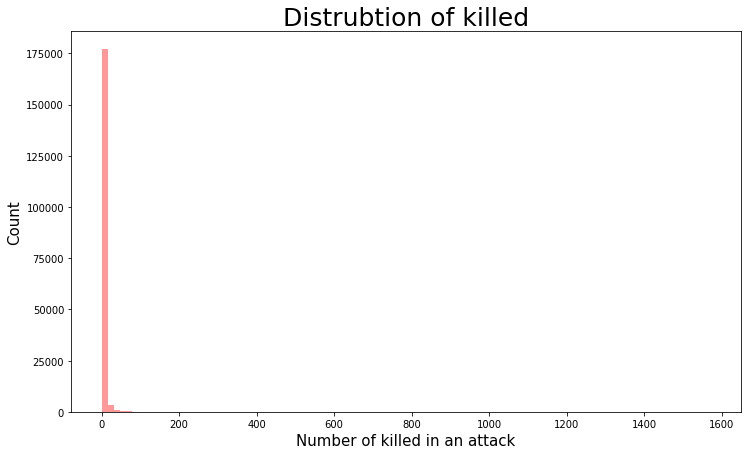

In [40]:
# distribuion number of people dead in each attack
plt.figure(figsize=(12,7))
sns.distplot(new_df['Killed'], kde = False, color ='red', bins = 100)
plt.title('Distrubtion of killed',fontsize=25)
plt.xlabel("Number of killed in an attack",fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

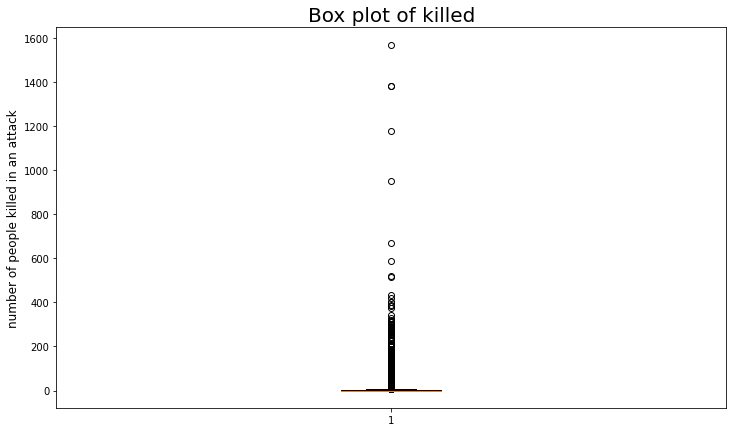

In [41]:
# Creating box plot
plt.figure(figsize=(12,7))
plt.boxplot(new_df['Killed'])
plt.title('Box plot of killed',fontsize=20)
plt.ylabel('number of people killed in an attack',fontsize=12)
# # show plot
plt.show()

In [42]:
new_df['Killed'].describe()

count    181691.000000
mean          2.266860
std          11.227057
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        1570.000000
Name: Killed, dtype: float64

* In less number of attacks, the number of dead is high as you can see in above code block. More than fifty percentile of attacks, number of dead is zero.

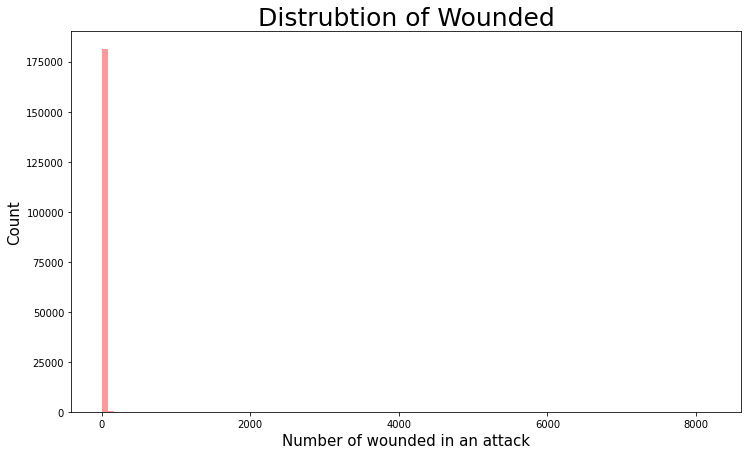

In [43]:
# distribuion number of people wounded in each attack
plt.figure(figsize=(12,7))
sns.distplot(new_df['Wounded'], kde = False, color ='red', bins = 100)
plt.title('Distrubtion of Wounded',fontsize=25)
plt.xlabel("Number of wounded in an attack",fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

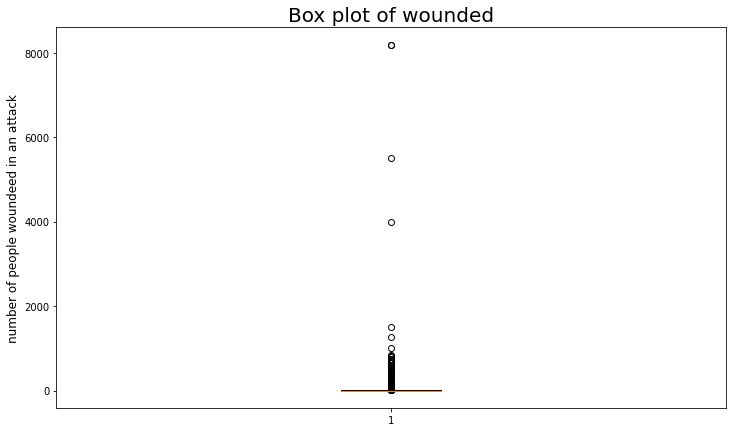

In [44]:
# Creating box plot
plt.figure(figsize=(12,7))
plt.boxplot(new_df['Wounded'])
plt.title('Box plot of wounded',fontsize=20)
plt.ylabel('number of people woundeed in an attack',fontsize=12)
# # show plot
plt.show()

 * In case of wounded, the trend is same as killed feature.

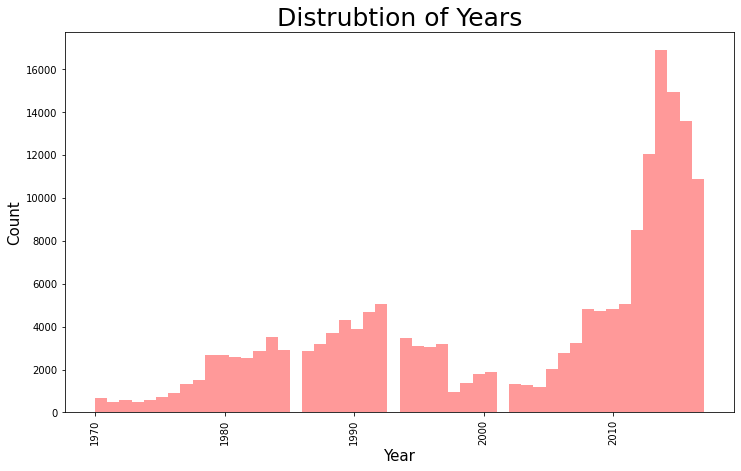

In [45]:
# distribuion of years in our data set
plt.figure(figsize=(12,7))
sns.distplot(new_df['Year'], kde = False, color ='red')
plt.title('Distrubtion of Years',fontsize=25)
plt.xlabel("Year",fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=90)
plt.show()

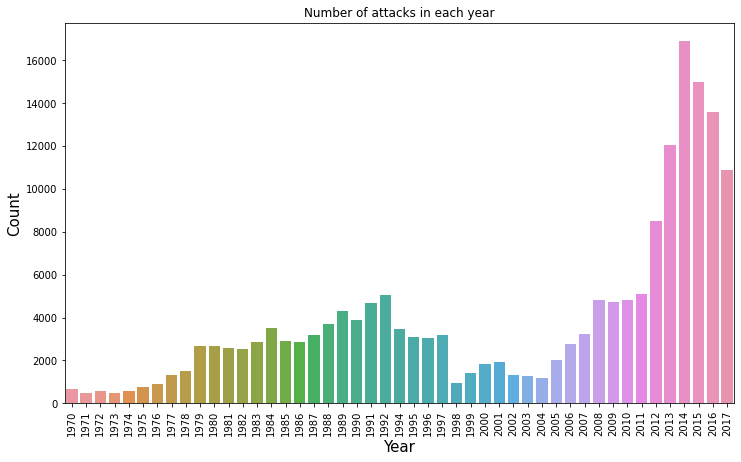

In [46]:
# count plot
plt.figure(figsize=(12,7))
sns.countplot(x='Year',data=new_df) 
plt.title('Number of attacks in each year')
plt.xlabel("Year",fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=90) 
plt.show() 

In [47]:
# distribuion of month in our data set
new_df['Month'].value_counts()

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: Month, dtype: int64

In [48]:
# Percentage of diifernt attack types
print("Percentage of diifernt attack types among total attacks:\n")
(new_df['Attack_Type'].value_counts()/new_df.shape[0])*100

Percentage of diifernt attack types among total attacks:



Bombing/Explosion                      48.574228
Armed Assault                          23.484377
Assassination                          10.629035
Hostage Taking (Kidnapping)             6.141196
Facility/Infrastructure Attack          5.699787
Unknown                                 4.004601
Unarmed Assault                         0.558641
Hostage Taking (Barricade Incident)     0.545432
Hijacking                               0.362704
Name: Attack_Type, dtype: float64

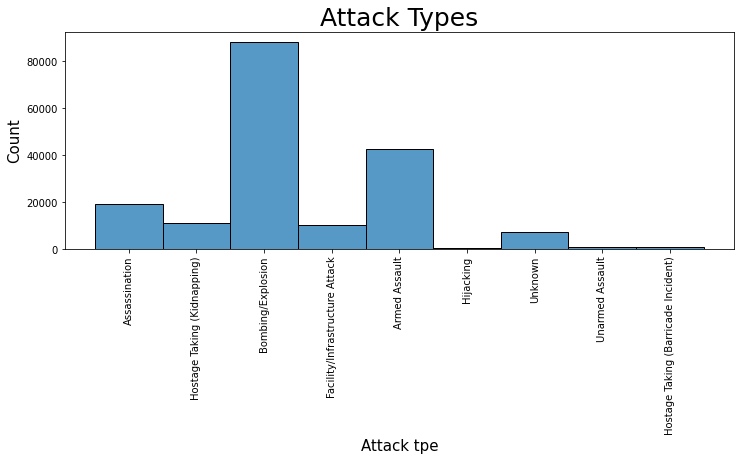

In [49]:
# visualisation of attack type distribution

plt.figure(figsize=(12,4))
# plt.figure(figsize=(12,7))

# histogram
sns.histplot(new_df['Attack_Type'],palette='cubehelix')
plt.title('Attack Types',fontsize=25)
plt.xlabel("Attack tpe",fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=90)
plt.show()

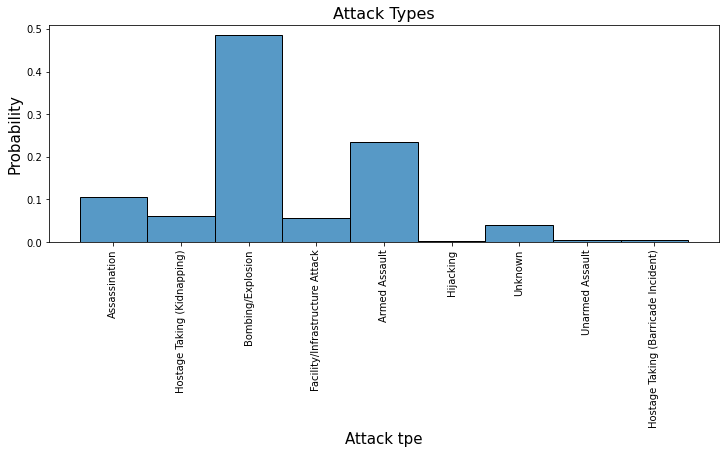

In [50]:
# Plot histogram
plt.figure(figsize=(12,4))
sns.histplot(data = new_df, x = "Attack_Type", stat = "probability", discrete = True)
plt.xticks(rotation=90)
plt.title('Attack Types',fontsize=16)
plt.xlabel("Attack tpe",fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.show()

## Observations:
***
1. The Bombing/Explosion is more than 48% .
2. The Armed Assault is around 24% .

## Countries and Number of times attacks happened in that country:

In [51]:
new_df.Country.value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: Country, Length: 205, dtype: int64

* International mentioned becuase, attack may be happened in sea territory.

In [52]:
print(f"The top ten countries attacked by terrorist groups  list is: \n {new_df['Country'].value_counts()[:10].index}")

The top ten countries attacked by terrorist groups  list is: 
 Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'El Salvador', 'United Kingdom', 'Turkey'],
      dtype='object')


In [53]:
# Percentage of attacks in each country
print("Percentage of attacks in each country among total attacks:\n")

(new_df['Country'].value_counts()[:10]/new_df.shape[0])*100

Percentage of attacks in each country among total attacks:



Iraq              13.559285
Pakistan           7.907932
Afghanistan        7.006951
India              6.582605
Colombia           4.571498
Philippines        3.802060
Peru               3.355147
El Salvador        2.928048
United Kingdom     2.881265
Turkey             2.362252
Name: Country, dtype: float64

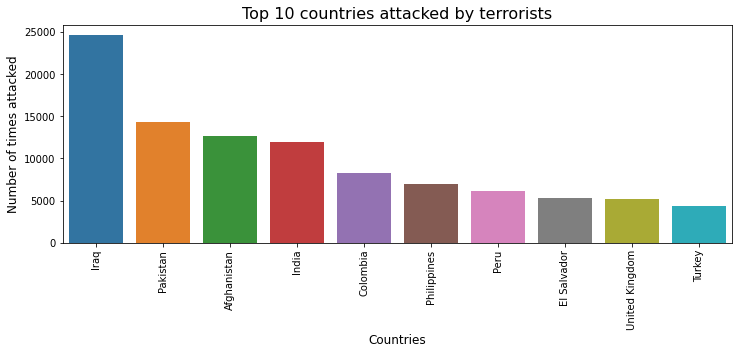

In [54]:
#  Countries which are most number of times attacked 
plt.figure(figsize=(12,4))
sns.barplot(new_df['Country'].value_counts()[:10].index,new_df['Country'].value_counts()[:10].values)
plt.title('Top 10 countries attacked by terrorists',fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Countries',fontsize=12)
plt.ylabel('Number of times attacked',fontsize=12)
plt.show()

In [55]:
# Percentage of diifernt Target types
print("Percentage of diifernt Target types among total attacks:\n")
(new_df['Target_Type'].value_counts().head(10)/new_df.shape[0])*100

Percentage of diifernt Target types among total attacks:



Private Citizens & Property       23.947801
Military                          15.401974
Police                            13.487735
Government (General)              11.713844
Business                          11.375907
Transportation                     3.742068
Utilities                          3.314969
Unknown                            3.246171
Religious Figures/Institutions     2.443709
Educational Institution            2.378764
Name: Target_Type, dtype: float64

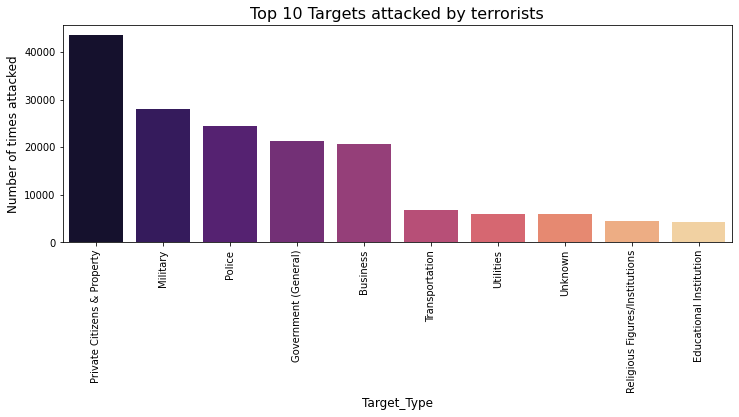

In [56]:
# Bar plot of Target type 
plt.figure(figsize=(12,4))
sns.barplot(new_df['Target_Type'].value_counts()[:10].index,new_df['Target_Type'].value_counts()[:10].values,palette='magma')
plt.title('Top 10 Targets attacked by terrorists',fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Target_Type',fontsize=12)
plt.ylabel('Number of times attacked',fontsize=12)
plt.show()

## 'Top 10 Targets attacked by terrorists' graph observations:
***
1. The most times attacked target type is 'Private Citizens & Property' which    is around 24% of the total number of attacks.
2. After 'Private Citizens & Property' , 'Military', 'Police',
 'Government(General)' are the most times attacked target types.

## Regions and states with most attacks:

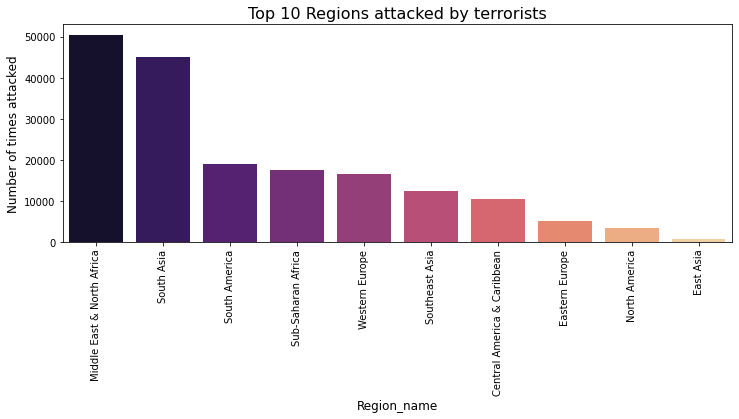

In [57]:
# top 10 regions with most attacks
plt.figure(figsize=(12,4))
sns.barplot(new_df['Region'].value_counts()[:10].index,new_df['Region'].value_counts()[:10].values,palette='magma')
plt.title('Top 10 Regions attacked by terrorists',fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Region_name',fontsize=12)
plt.ylabel('Number of times attacked',fontsize=12)
plt.show()


In [58]:
# Percentage of attacks in each region
print("Percentage of attacks in each region among total attacks:\n")
(new_df['Region'].value_counts().head(10)/new_df.shape[0])*100

Percentage of attacks in each region among total attacks:



Middle East & North Africa     27.780132
South Asia                     24.753015
South America                  10.445206
Sub-Saharan Africa              9.659257
Western Europe                  9.157856
Southeast Asia                  6.871557
Central America & Caribbean     5.693182
Eastern Europe                  2.831180
North America                   1.902131
East Asia                       0.441409
Name: Region, dtype: float64

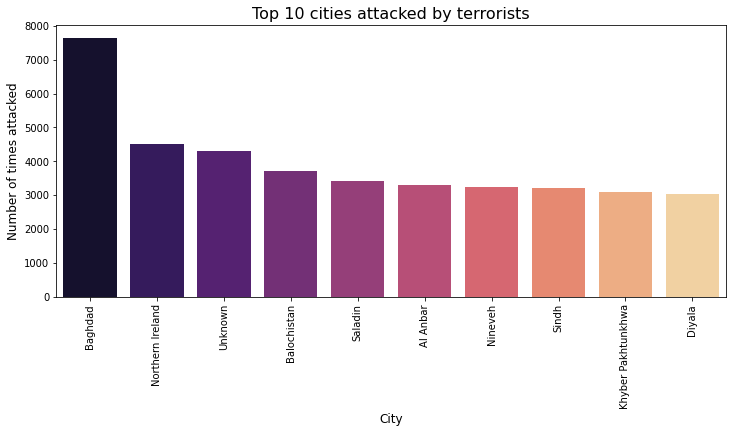

In [59]:
# NUmber of attacks in cities
plt.figure(figsize=(12,5))
sns.barplot(new_df['City'].value_counts()[:10].index,new_df['City'].value_counts()[:10].values,palette='magma')
plt.title('Top 10 cities attacked by terrorists',fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('City',fontsize=12)
plt.ylabel('Number of times attacked',fontsize=12)
plt.show()
# plt.rcParams['figure.figsize'] = [18, 5]

In [60]:
# Percentage of attacks in each city
print("Percentage of attacks in each city among total attacks:\n")
(new_df['City'].value_counts().head(10)/new_df.shape[0])*100

Percentage of attacks in each city among total attacks:



Baghdad               4.207693
Northern Ireland      2.475632
Unknown               2.361152
Balochistan           2.041928
Saladin               1.877363
Al Anbar              1.815720
Nineveh               1.783798
Sindh                 1.764534
Khyber Pakhtunkhwa    1.697387
Diyala                1.673721
Name: City, dtype: float64

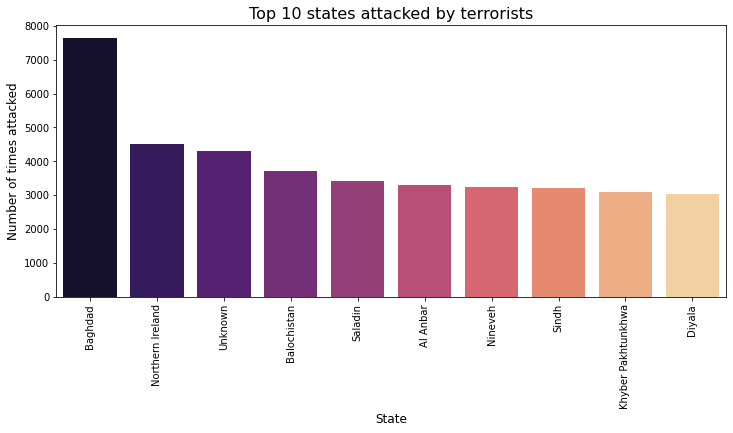

In [61]:
# NUmber of attacks in states
plt.figure(figsize=(12,5))
sns.barplot(new_df['State'].value_counts()[:10].index,new_df['State'].value_counts()[:10].values,palette='magma')
plt.title('Top 10 states attacked by terrorists',fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('State',fontsize=12)
plt.ylabel('Number of times attacked',fontsize=12)
plt.show()
# plt.rcParams['figure.figsize'] = [18, 5]

In [62]:
# Percentage of attacks in each stae
print("Percentage of attacks in each stae among total attacks:\n")
(new_df['State'].value_counts().head(10)/new_df.shape[0])*100

Percentage of attacks in each stae among total attacks:



Baghdad               4.207693
Northern Ireland      2.475632
Unknown               2.361152
Balochistan           2.041928
Saladin               1.877363
Al Anbar              1.815720
Nineveh               1.783798
Sindh                 1.764534
Khyber Pakhtunkhwa    1.697387
Diyala                1.673721
Name: State, dtype: float64

## From above plots, we can say
***
1. The most attacked region is "Middle East & North Africa", then comes 
   "South Asia".
2. The most attacked city is "Baghdad" which is capital of Iraq.

In [63]:
new_df.Weapon_Type.value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

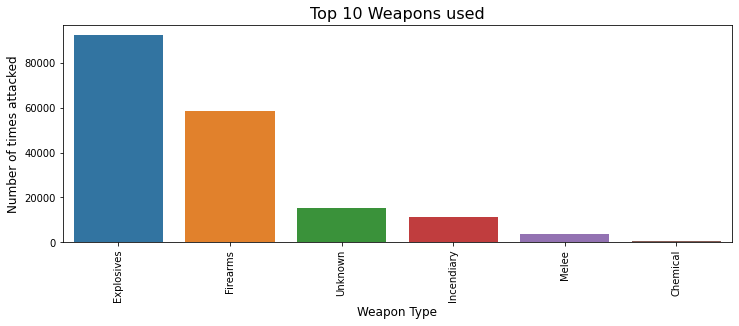

In [64]:
#  Weapon_Types  most times used 
plt.figure(figsize=(12,4))
sns.barplot(new_df['Weapon_Type'].value_counts()[:6].index,new_df['Weapon_Type'].value_counts()[:6].values)
plt.title('Top 10 Weapons used',fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Weapon Type',fontsize=12)
plt.ylabel('Number of times attacked',fontsize=12)
plt.show()

In [65]:
# percentage of weapon usage among all attacks
print("percentage of weapon usage among all attacks\n")
(new_df['Weapon_Type'].value_counts().head(6)/new_df.shape[0])*100

percentage of weapon usage among all attacks



Explosives    50.869883
Firearms      32.210731
Unknown        8.342185
Incendiary     6.128537
Melee          2.011657
Chemical       0.176674
Name: Weapon_Type, dtype: float64

Most likely weapon types used are "Explosives" (around 50%) and "Firearms"
 (around 32%).

##4. Bivariate Analysis

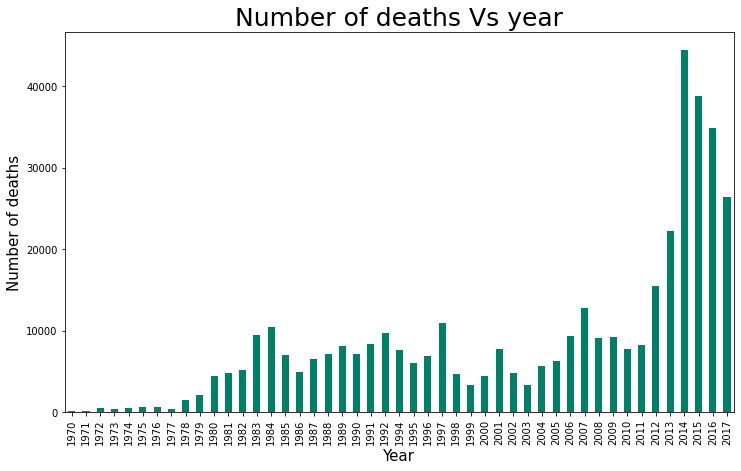

In [66]:
# number of deaths in each year 

plt.figure(figsize=(12,7))
new_df.groupby(['Year'])['Killed'].sum().plot(kind='bar',colormap='summer')
plt.title('Number of deaths Vs year',fontsize=25)
plt.ylabel('Number of deaths',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.xticks(rotation=90)
plt.show()

***
* The maximum number of deaths happened in the year of 2014 because maximum number attacks took place in this year.
* We can see significant increase in number of attacks from 1998.
* After 2014, number of deayhs dicreased, but as you can see they are large number of people who were dead.

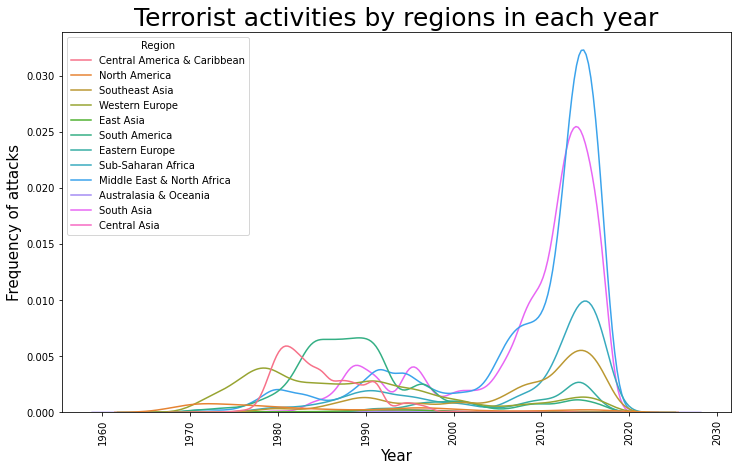

In [67]:
plt.figure(figsize=(12,7))
sns.kdeplot(new_df['Year'],hue=new_df['Region'])
plt.title('Terrorist activities by regions in each year',fontsize=25)
plt.ylabel('Frequency of attacks',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.xticks(rotation=90)
plt.show()

***
* The terrorist activities were increased from 2000 to 2014.
* The attacks reached to peak in the year of 2014.
* The "middle east & North africa" is most prone to terrorist attacks.

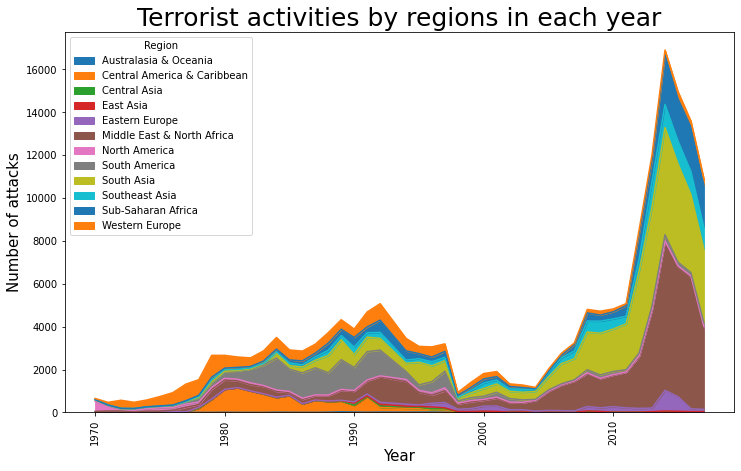

In [68]:
pd.crosstab(new_df["Year"],new_df["Region"]).plot(kind='area',figsize=(12,7))
plt.title('Terrorist activities by regions in each year',fontsize=25)
plt.ylabel('Number of attacks',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.xticks(rotation=90)
plt.show()


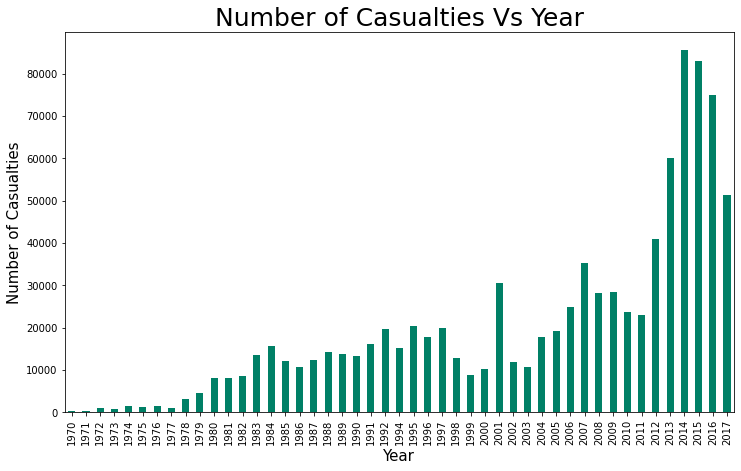

In [69]:
# number of casualities in each year 

plt.figure(figsize=(12,7))
new_df.groupby(['Year'])['Casualties'].sum().plot(kind='bar',colormap='summer')
plt.title('Number of Casualties Vs Year',fontsize=25)
plt.ylabel('Number of Casualties',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.xticks(rotation=90)
plt.show()

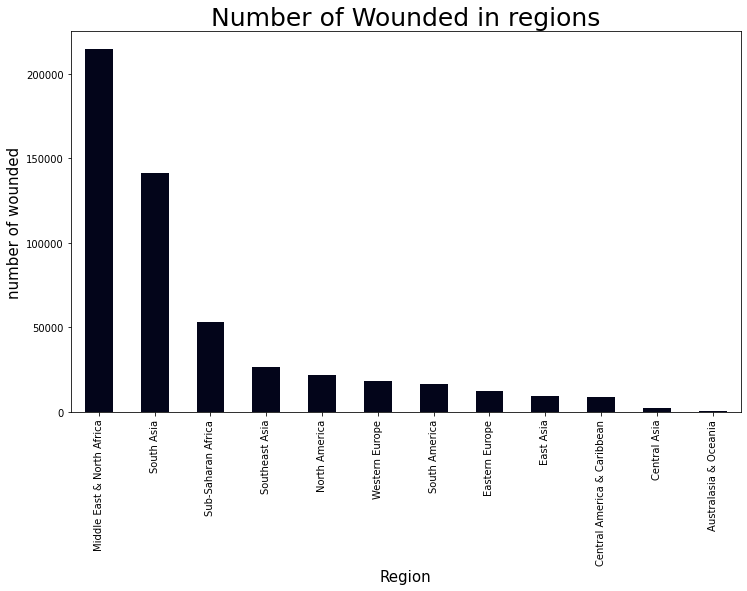

In [70]:
# number of people wounded in each region 

plt.figure(figsize=(12,7))
new_df.groupby(['Region'])['Wounded'].sum().sort_values(ascending=False).plot(kind='bar',colormap='rocket')
plt.title('Number of Wounded in regions',fontsize=25)
plt.ylabel('number of wounded',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.xticks(rotation=90)
plt.show()

* "Middle East & North Africa" has most number of wounded people (more than 2 lacs)


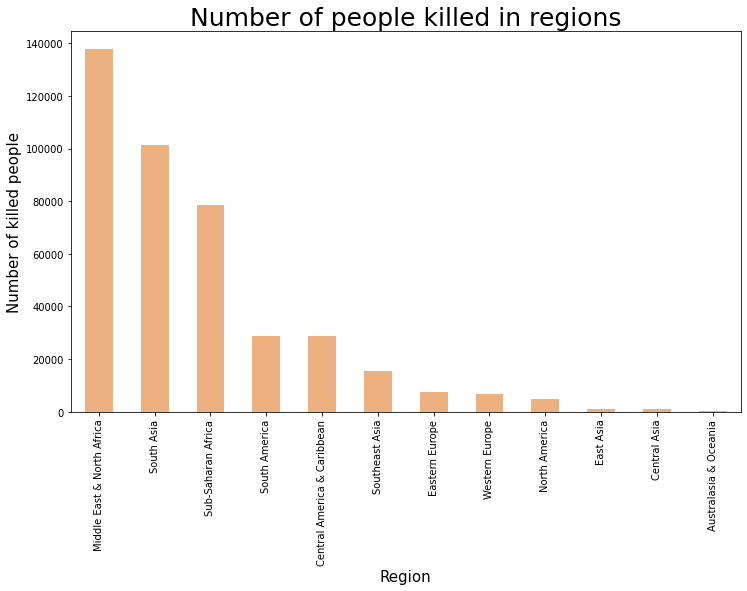

In [71]:
# number of people killed in each region 

plt.figure(figsize=(12,7))
new_df.groupby(['Region'])['Killed'].sum().sort_values(ascending=False).plot(kind='bar',colormap='flare')
plt.title('Number of people killed in regions',fontsize=25)
plt.ylabel('Number of killed people',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.xticks(rotation=90)
plt.show()

* "Middle East & North Africa" has most number of killed people (more than 1.3 lacs)

## Country having most number of killed people and most number of wounded people:

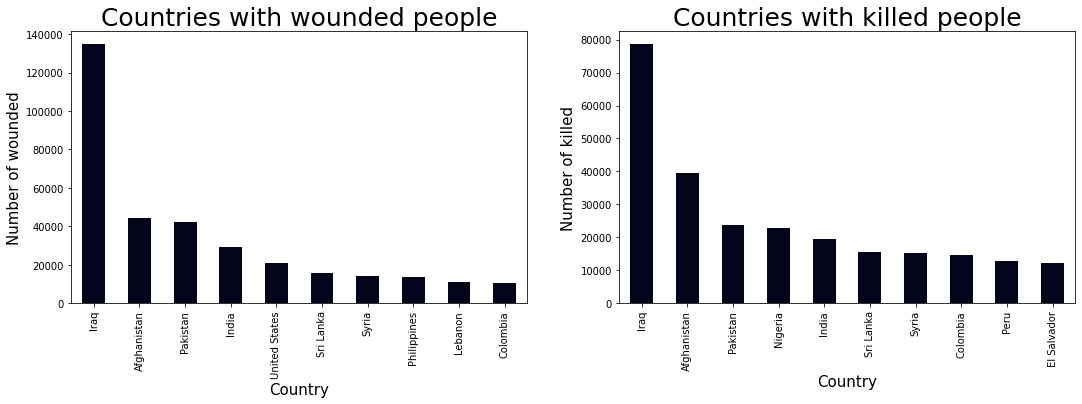

In [72]:
# countries with number of wounded people due to terror attacks
plt.subplot(1,2,1)
new_df.groupby(['Country'])['Wounded'].sum().sort_values(ascending=False).head(10).plot(kind='bar',colormap='rocket')
plt.title('Countries with wounded people',fontsize=25)
plt.ylabel('Number of wounded',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.xticks(rotation=90)

# countries with number of deaths due to terror attacks
plt.subplot(1,2,2)
new_df.groupby(['Country'])['Killed'].sum().sort_values(ascending=False).head(10).plot(kind='bar',colormap='rocket')
plt.title('Countries with killed people',fontsize=25)
plt.ylabel('Number of killed',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.xticks(rotation=90)

plt.gcf().set_size_inches(18,5)

* The country named Iraq having more number of wounded around 1.35 lac people.
* The same country (Iraq) listed in more number of people deaths in terror attacks (around 75,000).

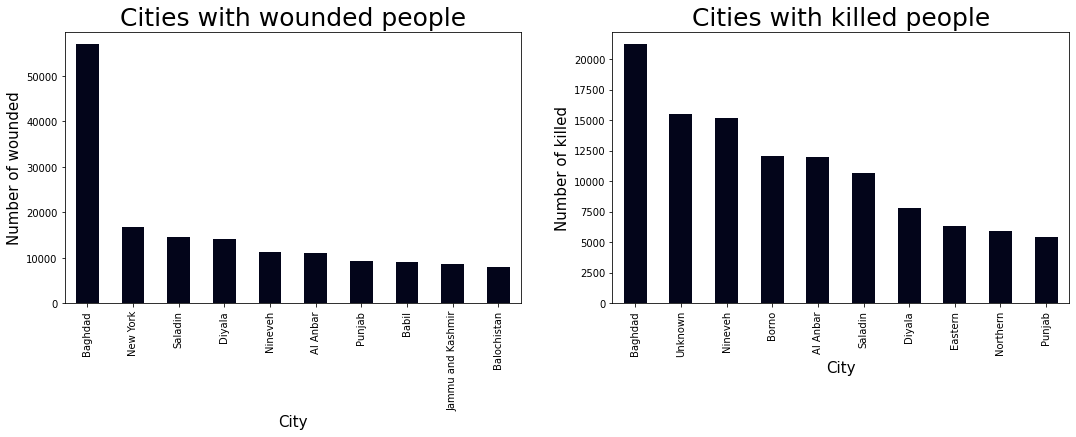

In [73]:
# cities with number of wounded people due to terror attacks
plt.subplot(1,2,1)
new_df.groupby(['City'])['Wounded'].sum().sort_values(ascending=False).head(10).plot(kind='bar',colormap='rocket')
plt.title('Cities with wounded people',fontsize=25)
plt.ylabel('Number of wounded',fontsize=15)
plt.xlabel('City',fontsize=15)
plt.xticks(rotation=90)

# cities with number of deaths due to terror attacks
plt.subplot(1,2,2)
new_df.groupby(['City'])['Killed'].sum().sort_values(ascending=False).head(10).plot(kind='bar',colormap='rocket')
plt.title('Cities with killed people',fontsize=25)
plt.ylabel('Number of killed',fontsize=15)
plt.xlabel('City',fontsize=15)
plt.xticks(rotation=90)

plt.gcf().set_size_inches(18,5)

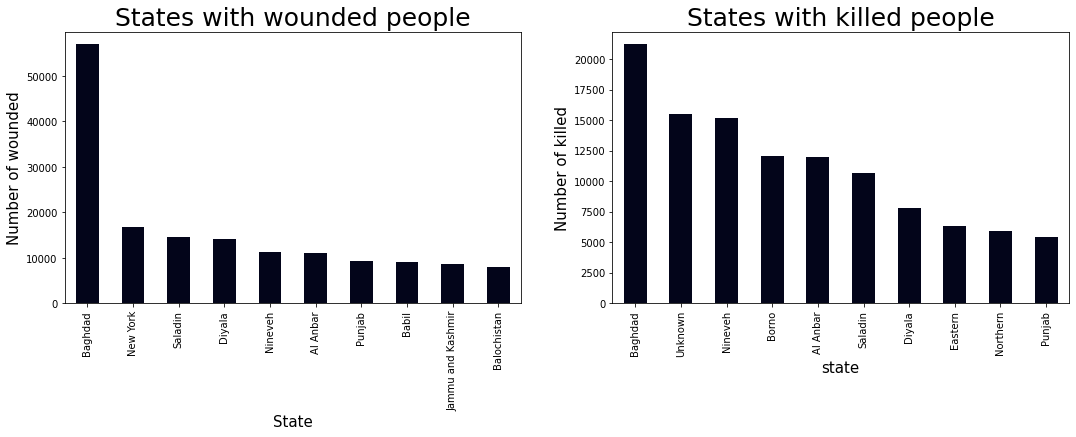

In [74]:
# states with number of wounded people due to terror attacks
plt.subplot(1,2,1)
new_df.groupby(['State'])['Wounded'].sum().sort_values(ascending=False).head(10).plot(kind='bar',colormap='rocket')
plt.title('States with wounded people',fontsize=25)
plt.ylabel('Number of wounded',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.xticks(rotation=90)

# statees with number of deaths due to terror attacks
plt.subplot(1,2,2)
new_df.groupby(['State'])['Killed'].sum().sort_values(ascending=False).head(10).plot(kind='bar',colormap='rocket')
plt.title('States with killed people',fontsize=25)
plt.ylabel('Number of killed',fontsize=15)
plt.xlabel('state',fontsize=15)
plt.xticks(rotation=90)

plt.gcf().set_size_inches(18,5)

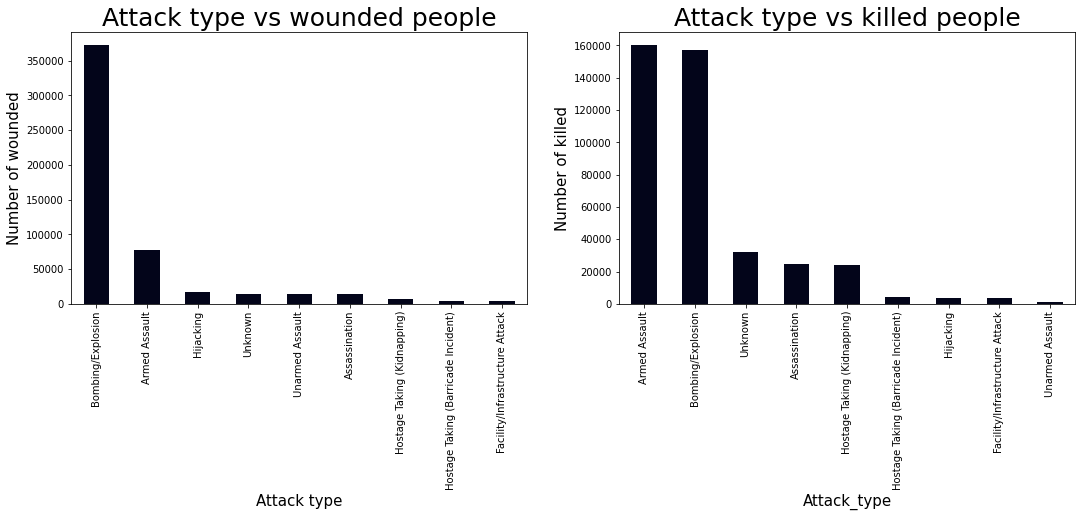

In [75]:
# Attack type with number of wounded people due to terror attacks
plt.subplot(1,2,1)
new_df.groupby(['Attack_Type'])['Wounded'].sum().sort_values(ascending=False).head(10).plot(kind='bar',colormap='rocket')
plt.title('Attack type vs wounded people',fontsize=25)
plt.ylabel('Number of wounded',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.xticks(rotation=90)

# Attack type with number of deaths due to terror attacks
plt.subplot(1,2,2)
new_df.groupby(['Attack_Type'])['Killed'].sum().sort_values(ascending=False).head(10).plot(kind='bar',colormap='rocket')
plt.title('Attack type vs killed people',fontsize=25)
plt.ylabel('Number of killed',fontsize=15)
plt.xlabel('Attack_type',fontsize=15)
plt.xticks(rotation=90)

plt.gcf().set_size_inches(18,5)

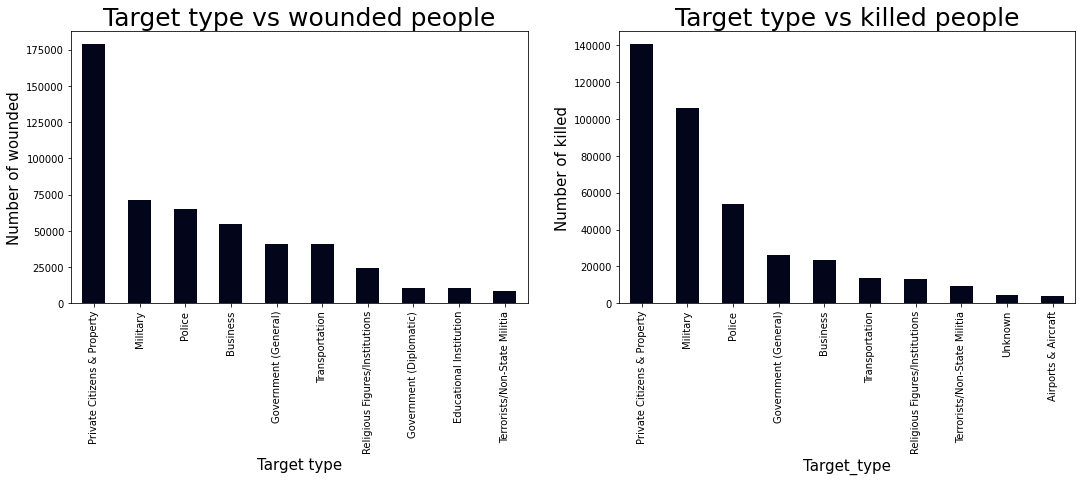

In [76]:
# Target type with number of wounded people due to terror attacks
plt.subplot(1,2,1)
new_df.groupby(['Target_Type'])['Wounded'].sum().sort_values(ascending=False).head(10).plot(kind='bar',colormap='rocket')
plt.title('Target type vs wounded people',fontsize=25)
plt.ylabel('Number of wounded',fontsize=15)
plt.xlabel('Target type',fontsize=15)
plt.xticks(rotation=90)

# Target type with number of deaths due to terror attacks
plt.subplot(1,2,2)
new_df.groupby(['Target_Type'])['Killed'].sum().sort_values(ascending=False).head(10).plot(kind='bar',colormap='rocket')
plt.title('Target type vs killed people',fontsize=25)
plt.ylabel('Number of killed',fontsize=15)
plt.xlabel('Target_type',fontsize=15)
plt.xticks(rotation=90)

plt.gcf().set_size_inches(18,5)

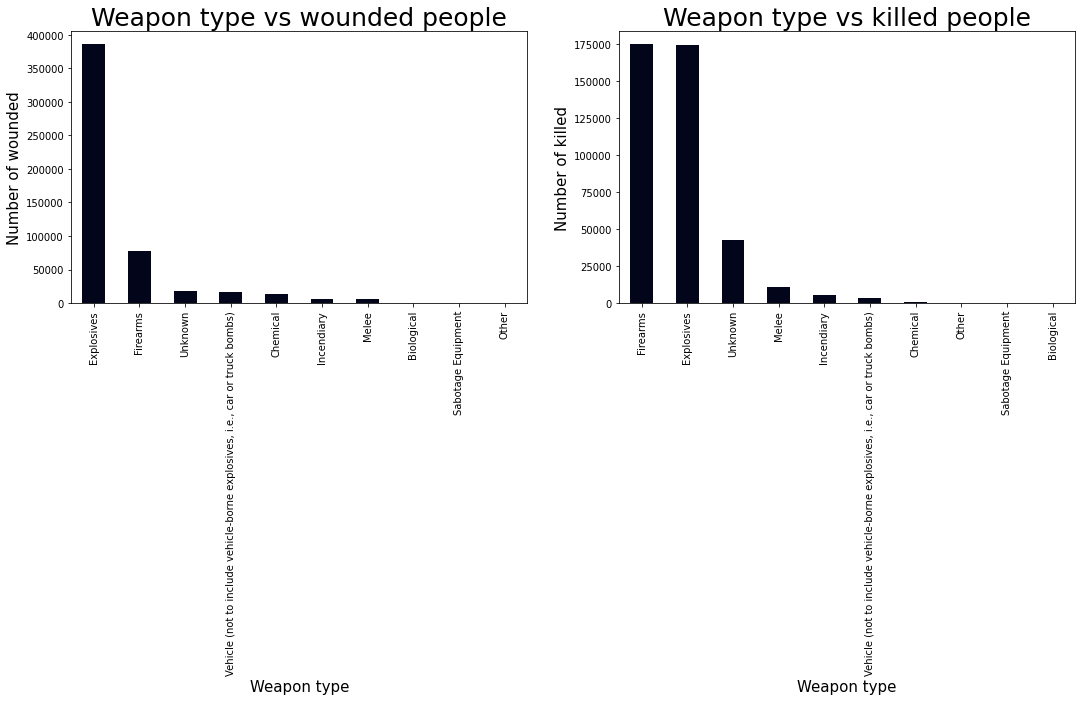

In [77]:
# Weapon type with number of wounded people due to terror attacks
plt.subplot(1,2,1)
new_df.groupby(['Weapon_Type'])['Wounded'].sum().sort_values(ascending=False).head(10).plot(kind='bar',colormap='rocket')
plt.title('Weapon type vs wounded people',fontsize=25)
plt.ylabel('Number of wounded',fontsize=15)
plt.xlabel('Weapon type',fontsize=15)
plt.xticks(rotation=90)

# Weapon type with number of deaths due to terror attacks
plt.subplot(1,2,2)
new_df.groupby(['Weapon_Type'])['Killed'].sum().sort_values(ascending=False).head(10).plot(kind='bar',colormap='rocket')
plt.title('Weapon type vs killed people',fontsize=25)
plt.ylabel('Number of killed',fontsize=15)
plt.xlabel('Weapon type',fontsize=15)
plt.xticks(rotation=90)

plt.gcf().set_size_inches(18,5)

## Terrorist Groups:

* we already know that number of unknown groups are more in our data set. So when we go for grouping plots or value counts, we get "unknown" comes at top.
That is why when we use plots, we start from index 1 instead of index 0.

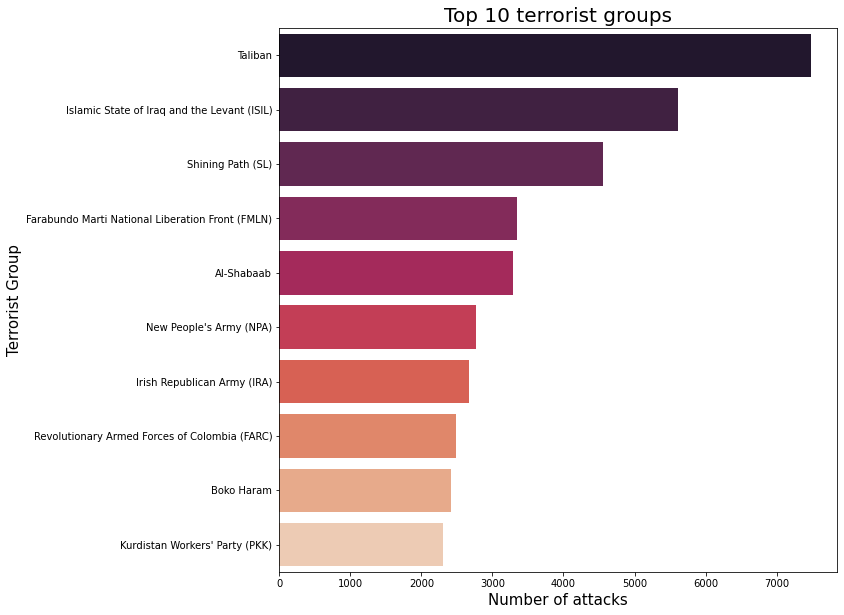

In [78]:
# Number of attacks by different terrorist groups
plt.figure(figsize=(10,10))
sns.barplot(new_df["Group"].value_counts()[1:11].values,new_df["Group"].value_counts()[1:11].index,palette='rocket')

plt.title('Top 10 terrorist groups',fontsize=20)
plt.xlabel("Number of attacks",fontsize=15)
plt.ylabel("Terrorist Group",fontsize=15)
plt.show()

***
* Here, we can see that highest number of attacks were done by Taliban group.

In [79]:
# dataframe having only Taliban group
new_df_talib=new_df[new_df["Group"]=="Taliban"]

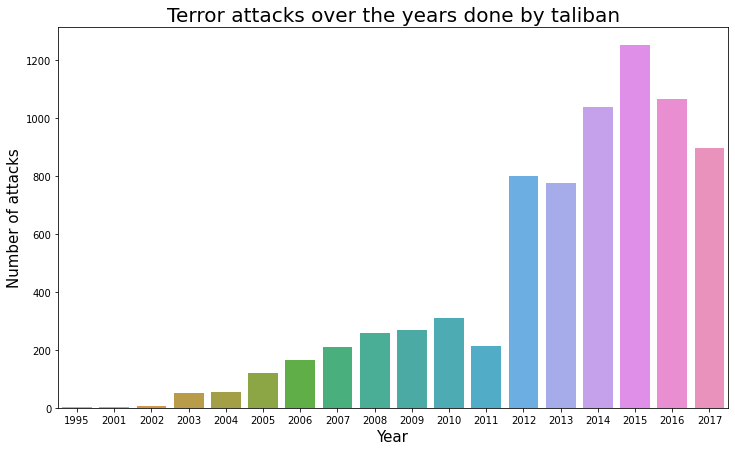

In [80]:
# Attacks done by Taliban group over the years
plt.figure(figsize=(12,7))
sns.barplot(new_df_talib["Year"].value_counts().index,new_df_talib["Year"].value_counts().values)
plt.title("Terror attacks over the years done by taliban",fontsize=20)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.show()

***
* Taliban group attacks incresed drastically after 2011.
* High number of attacks were done in the year of 2015 (more than 1200).
* From 2012 onwards, every year the number of attacks are more than 800.

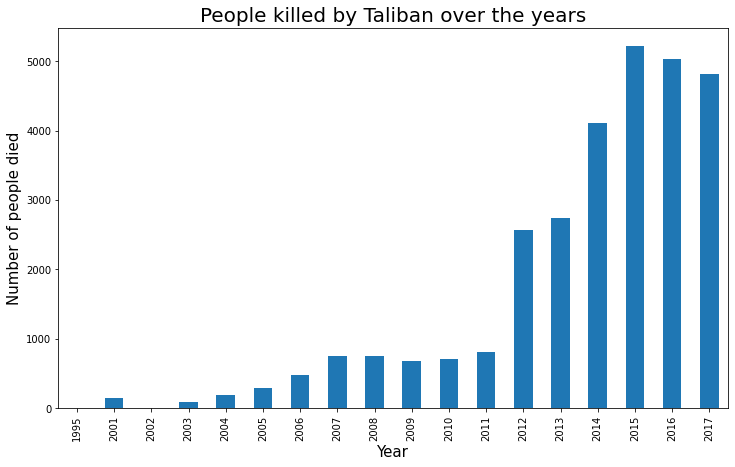

In [81]:
# people killed by taliban over the years
plt.figure(figsize=(12,7))
new_df_talib.groupby(["Year"])["Killed"].sum().plot(kind='bar')
plt.title("People killed by Taliban over the years",fontsize=20)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Number of people died",fontsize=15)
plt.xticks(rotation=90)
# plt.grid()
plt.show()

***
* The more number of people killed by Taliban group in the 2014. After this number reduced, but still it is high.

In [82]:
# creating new dataframe related to year 2014.
new_df_2014=new_df[new_df["Year"]==2014]

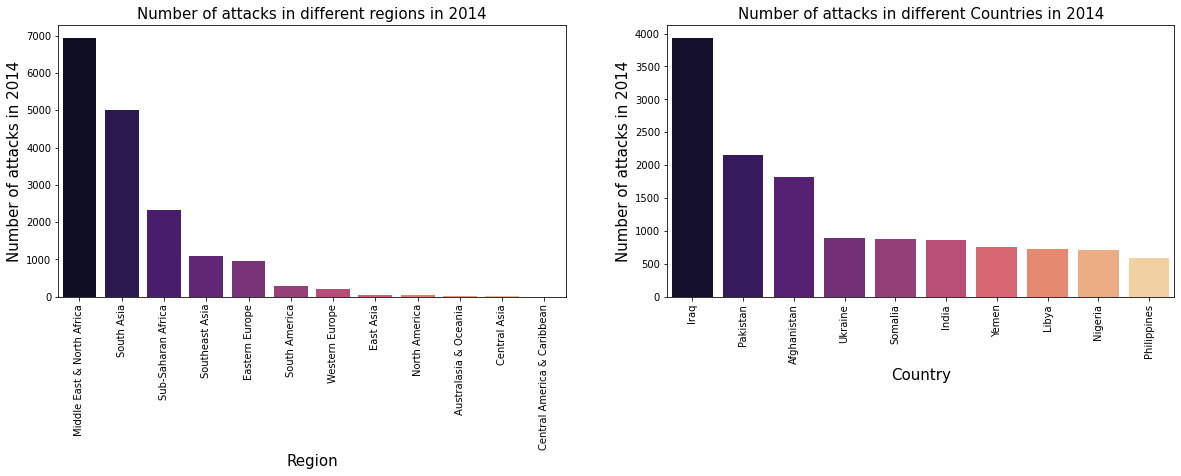

In [83]:
# regions that were attacked most in 2014
plt.subplot(1,2,1)
sns.barplot(new_df_2014['Region'].value_counts().index,new_df_2014['Region'].value_counts().values,palette='magma')
plt.title("Number of attacks in different regions in 2014",fontsize=15)
plt.xlabel("Region",fontsize=15)
plt.ylabel('Number of attacks in 2014',fontsize=15)
plt.xticks(rotation=90)

# top 10 countries that were attacked by terrorist groups in 2014
plt.subplot(1,2,2)
sns.barplot(new_df_2014['Country'].value_counts().head(10).index,new_df_2014['Country'].value_counts().head(10).values,palette='magma')
plt.title("Number of attacks in different Countries in 2014",fontsize=15)
plt.xlabel("Country",fontsize=15)
plt.ylabel('Number of attacks in 2014',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(20,5)


## From the above graphs, we can conclude that:
***
* In 2014, most attacked region is "Middle East & North Africa" then comes 'Sounth Asia'.
* In 2014, most attacked country is Iraq.

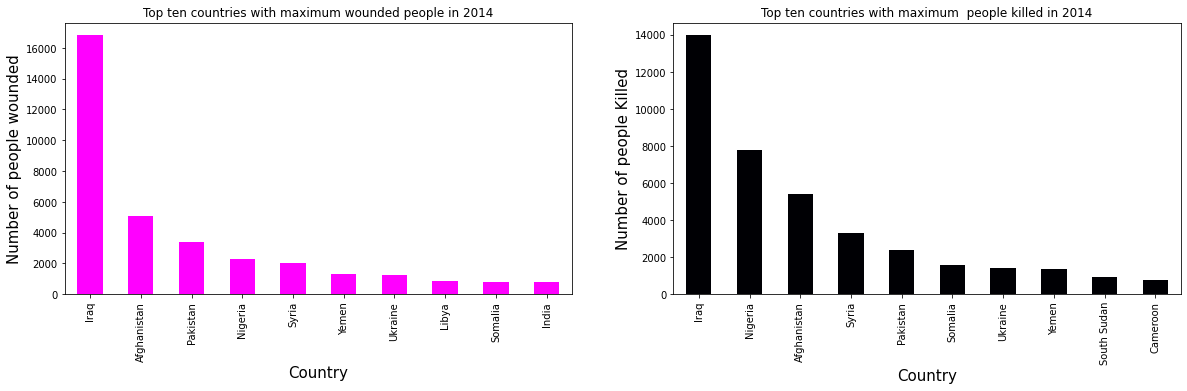

In [84]:
# Top 10 countries with killed and wounded persons

# top countries with wounded people in 2014
plt.subplot(1,2,1)
new_df_2014.groupby(['Country'])['Wounded'].sum().sort_values(ascending=False).head(10).plot(kind='bar',colormap='spring')
plt.title("Top ten countries with maximum wounded people in 2014")
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of people wounded',fontsize=15)
plt.xticks(rotation=90)

# top countries with maximum number of deaths due to terror attacks in 2014
plt.subplot(1,2,2)
new_df_2014.groupby(['Country'])['Killed'].sum().sort_values(ascending=False).head(10).plot(kind='bar',colormap='magma')
plt.title("Top ten countries with maximum  people killed in 2014")
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of people Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(20,5)

* In 2014, the high number of people wounded and died in Iraq country.

##5. Conclusions:
***
**After exploratory data analysis was done,the below points can be observed:**

* The number of attacks were increased over the years. That means the terrorist groups are getting support for different reasons.
* Total number of people died over the years from 1971 to 2017 due to terrorist attacks is 4,11,868.
* The most active terrorist group in the world is Taliban.
* The year with most number of terrorist attacks is 2014.
* The year with less number of terrorist attacks is 1971.
* The most probable attack is Bombing/Explosion(48%) and then
 Armed Assault(23.5%),Assassination(10.6%),Hostage Taking (Kidnapping) and so on.
* Iraq is the country which is more number of times attacked by terrorist groups, then  'Pakistan', 'Afghanistan' and so on.
* The most of the times attacked target type is 'Private Citizens & Property' which is around 24% of the total number of attacks. After that 'Private Citizens & Property' , 'Military', 'Police', 'Government(General)' are the most times attacked target types.
* The most attacked region is "Middle East & North Africa", then comes "South Asia". The most attacked city is "Baghdad" which is capital of Iraq.
* The most likely weapon type used is "Explosives" (around 50%) and then "Firearms" (around 32%).
* The terrorist activities were steeply increased from 2000 to 2014. The attacks reached to peak in the year of 2014. After 2014, number of attacks dicreased, but still they are large number of attacks.
* The "Middle East & North Africa" region has most number of wounded people (more than 2 lacs).
* The "Middle East & North Africa" region has most number of killed people (more than 1.3 lacs).
* The country named Iraq having more number of wounded around 1.35 lac people.
The same country listed in more number of people deaths in terror attacks (around 75,000).
* The highest number of attacks were done by Taliban group(more than 7000).
* Taliban group attacks incresed drastically after 2011. High number of attacks were done in the year of 2015 (more than 1200).


#6. Recommendations to mitigate terrorist attacks:
***
* The governments should have some policies over production, usage and tracking of explosives.
* The government should allocate security forces for tightly densed 'Private Citizens & Property' areas.
* Counter terrorism agencies, must focus on "Middle East & North Africa" region and Iraq country.

